<a href="https://colab.research.google.com/github/hizadoraconstanza/canada3/blob/main/Regre_Hizadora_Constanza__Machine_Learning_%26_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Uma mochileira amante de cinema (e do Canadá)

**Disciplina:** Machine Learning & Analytics

**Nome:** Hizadora Constanza Medina DAmbros

**Dataset:** https://raw.githubusercontent.com/hizadoraconstanza/canada3/refs/heads/main/canadamovietheatres3.csv


# Contexto, Objetivo e Definição do Problema

**Contexto:**
Uma mochileira amante de cinema precisa escolher o destino das suas próximas férias. Considerando seu orçamento limitado e seu desejo de aproveitar as férias assistido o maior número possível de filmes, ela precisa estimar os valores dos ingressos do cinema para escolher para onde viajar.


**Objetivo:**
Encontrar o modelo mais ajustado para estimar o valor dos ingressos de cinema nas províncias do Canadá.


**Escopo:**
Analisar os dados de geografia, intraestrutura e operações dos cinemas das províncias do Canadá no período de 1996/1997 - 2004/2005 para encontrar o modelo mais ajustado ao problema.

# Carga, Entendimento e Qualidade dos Dados

**Dataset:** Dataset CanadaMovieTheatres foi estruturado a partir do conjunto de dados "Movie theatres and drive-ins" disponibilizado pela University of Toronto e School of Cities. Os dados contém uma série histórica de atributos de geografia, intraestrutura e operações dos cinemas das províncias do Canadá no período de 1996/1997 - 2004/2005.



**Atributos do Dataset:** Dataset contém os seguintes atributos:

- *location* (nome da província)
- *ref_date* (data de referência, bianual)
- *num_theatres* (número de cinemas, unidade)
- *num_seats* (número de assentos, unidade)
- *total_operating_revenue* (total de receitas operacionais, dólares)
- *total_operating_expenses* (total de despesas operacionais, dólares)
- *profit_margin* (margem de lucro como porcentagem da receita total, percentual)
- *full-time_employment* (total de empregados em tempo integral, unidade)
- *average_ticket_prices* (preço médio dos ingressos, dólares)

**Importação das Bibliotecas Necessárias e Carga de Dados:** Importações de bibliotecas necessárias para a realização da atividade.

In [132]:
import pandas as pd
import numpy as np
import missingno as ms
import matplotlib.pyplot as plt
import matplotlib as mlp
import seaborn as sns
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import os, random, time, sys, math
from sklearn.metrics import (mean_absolute_error, mean_squared_error, r2_score,
                             silhouette_score, make_scorer)

In [133]:
# Informação da url de importação do dataset
url = "https://raw.githubusercontent.com/hizadoraconstanza/canada3/refs/heads/main/canadamovietheatres3.csv"

In [134]:
# Leitura do arquivo
dataset = pd.read_csv(url, delimiter=',')

**Análise de Dados Exploratória**: Entendimento da distribuição, as relações e as características das variáveis.

In [135]:
# Exibe dimensões do dataset
dataset.shape

(88, 9)

In [136]:
# Exibe informações do dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   location                  88 non-null     object 
 1   ref_date                  88 non-null     object 
 2   num_theatres              88 non-null     int64  
 3   num_seats                 63 non-null     float64
 4   total_operating_revenue   88 non-null     int64  
 5   total_operating_expenses  63 non-null     float64
 6   profit_margin             63 non-null     float64
 7   full-time_employment      88 non-null     int64  
 8   average_ticket_prices     63 non-null     float64
dtypes: float64(4), int64(3), object(2)
memory usage: 6.3+ KB


In [137]:
# Exibe informações das 5 primeiras linhas do dataset
dataset.head (5)

,location,ref_date,num_theatres,num_seats,total_operating_revenue,total_operating_expenses,profit_margin,full-time_employment,average_ticket_prices
0,Ontario,1996/1997,189,182121.0,233615,208588.0,10.7,434,5.13
1,Ontario,1997/1998,192,196078.0,258046,227034.0,12.0,444,5.38
2,Ontario,1998/1999,184,212140.0,311490,287096.0,7.8,544,5.70
3,Ontario,1999/2000,200,263030.0,359732,355712.0,1.1,612,6.14
4,Ontario,2000/2001,211,282015.0,397633,425364.0,-7.0,759,6.78


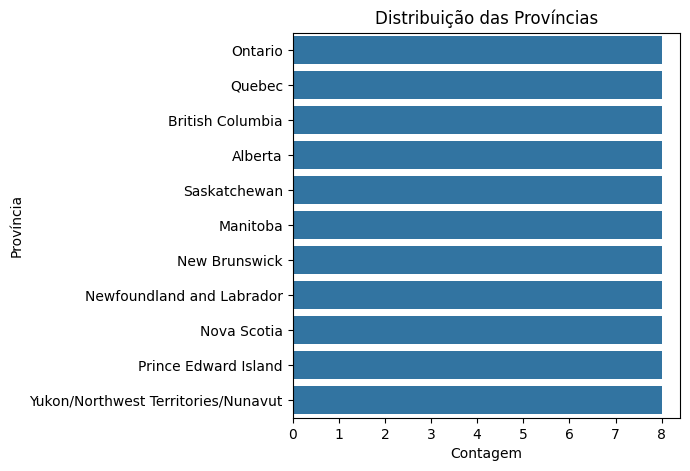

In [138]:
# Distribuição do dataset pelo atributo 'location'
plt.figure(figsize=(5, 5))
sns.countplot(y='location', data=dataset)
plt.title('Distribuição das Províncias')
plt.xlabel('Contagem')
plt.ylabel('Província')
plt.show()

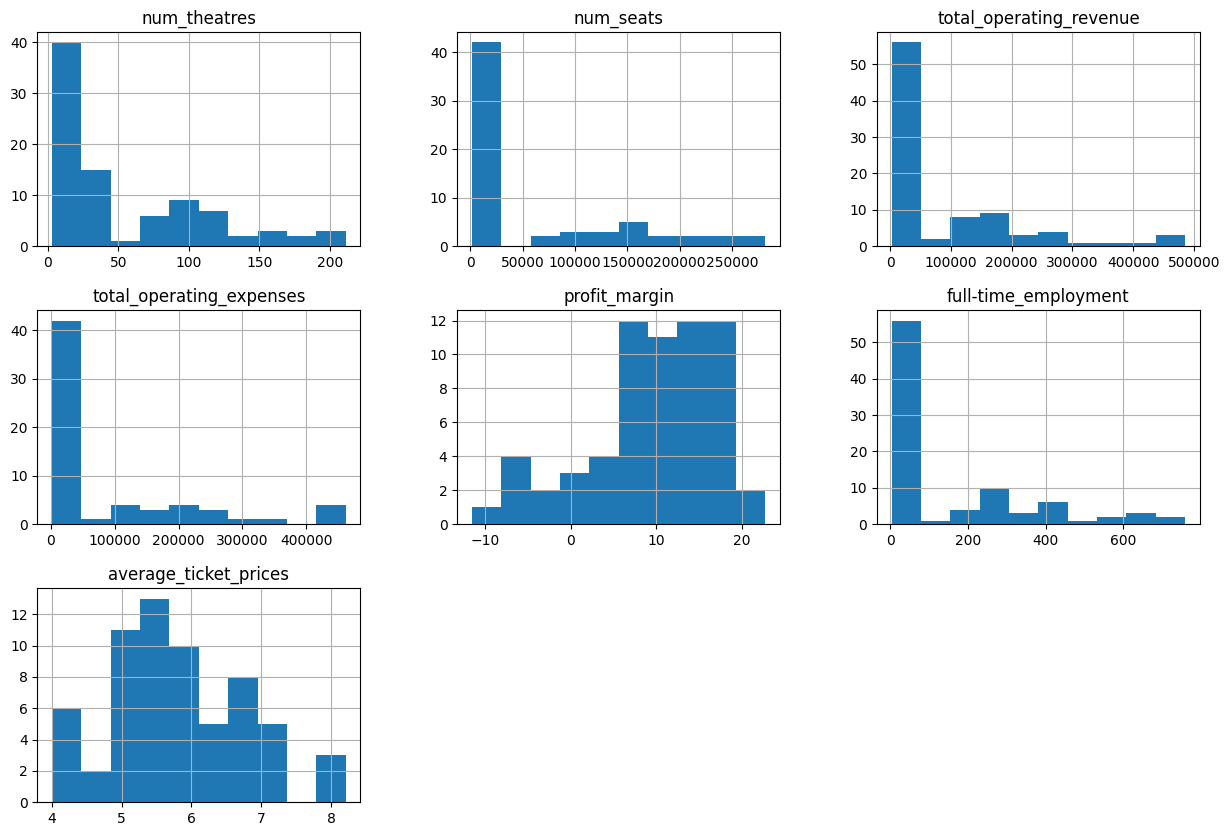

In [139]:
# Exibe histograma dos valores do dataset
dataset.hist(figsize =(15,10))
plt.show()

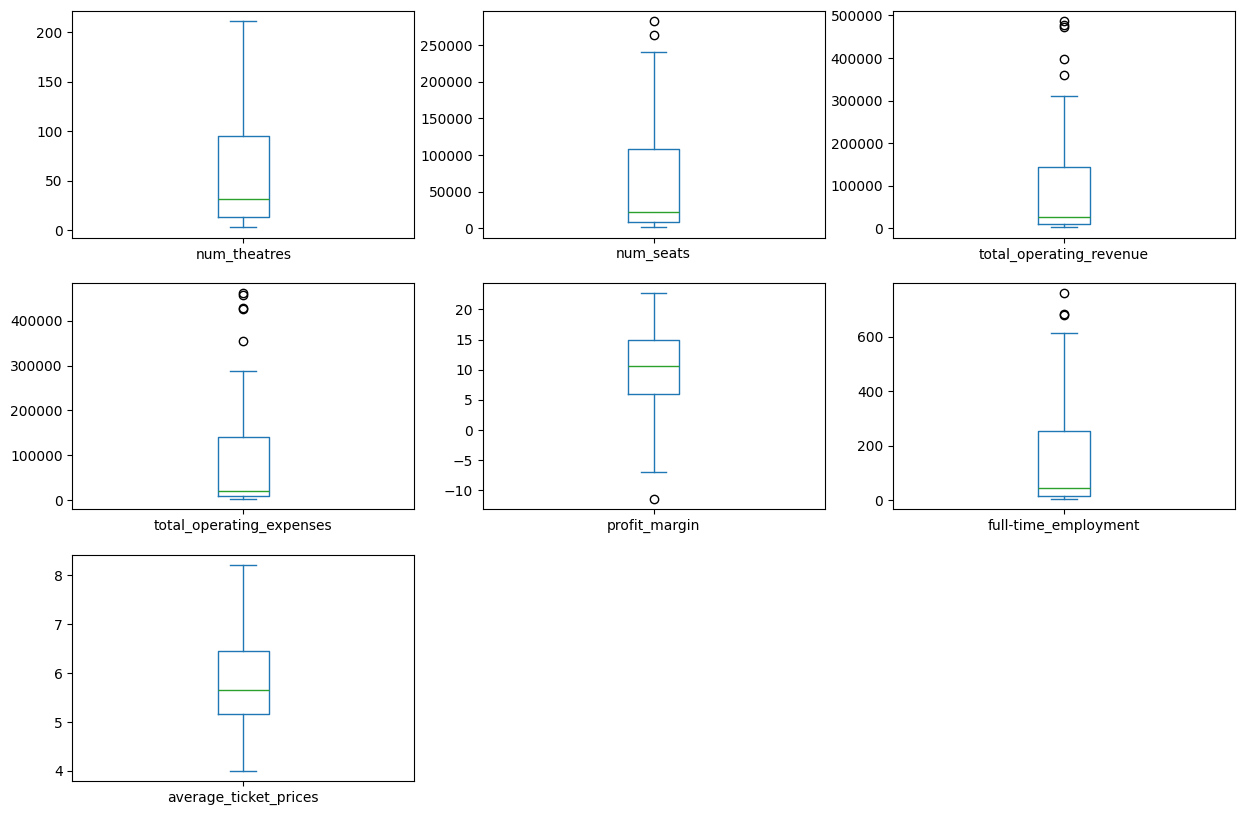

In [140]:
# Exibe boxplot dos valores do dataset
dataset.plot(kind = 'box',subplots = True, layout = (3,3), sharex = False,sharey = False,figsize =(15,10))
plt.show()

In [141]:
# Verifica valores nulos no dataset
dataset.isnull().sum()

,0
location,0
ref_date,0
num_theatres,0
num_seats,25
total_operating_revenue,0
total_operating_expenses,25
profit_margin,25
full-time_employment,0
average_ticket_prices,25


<Axes: >

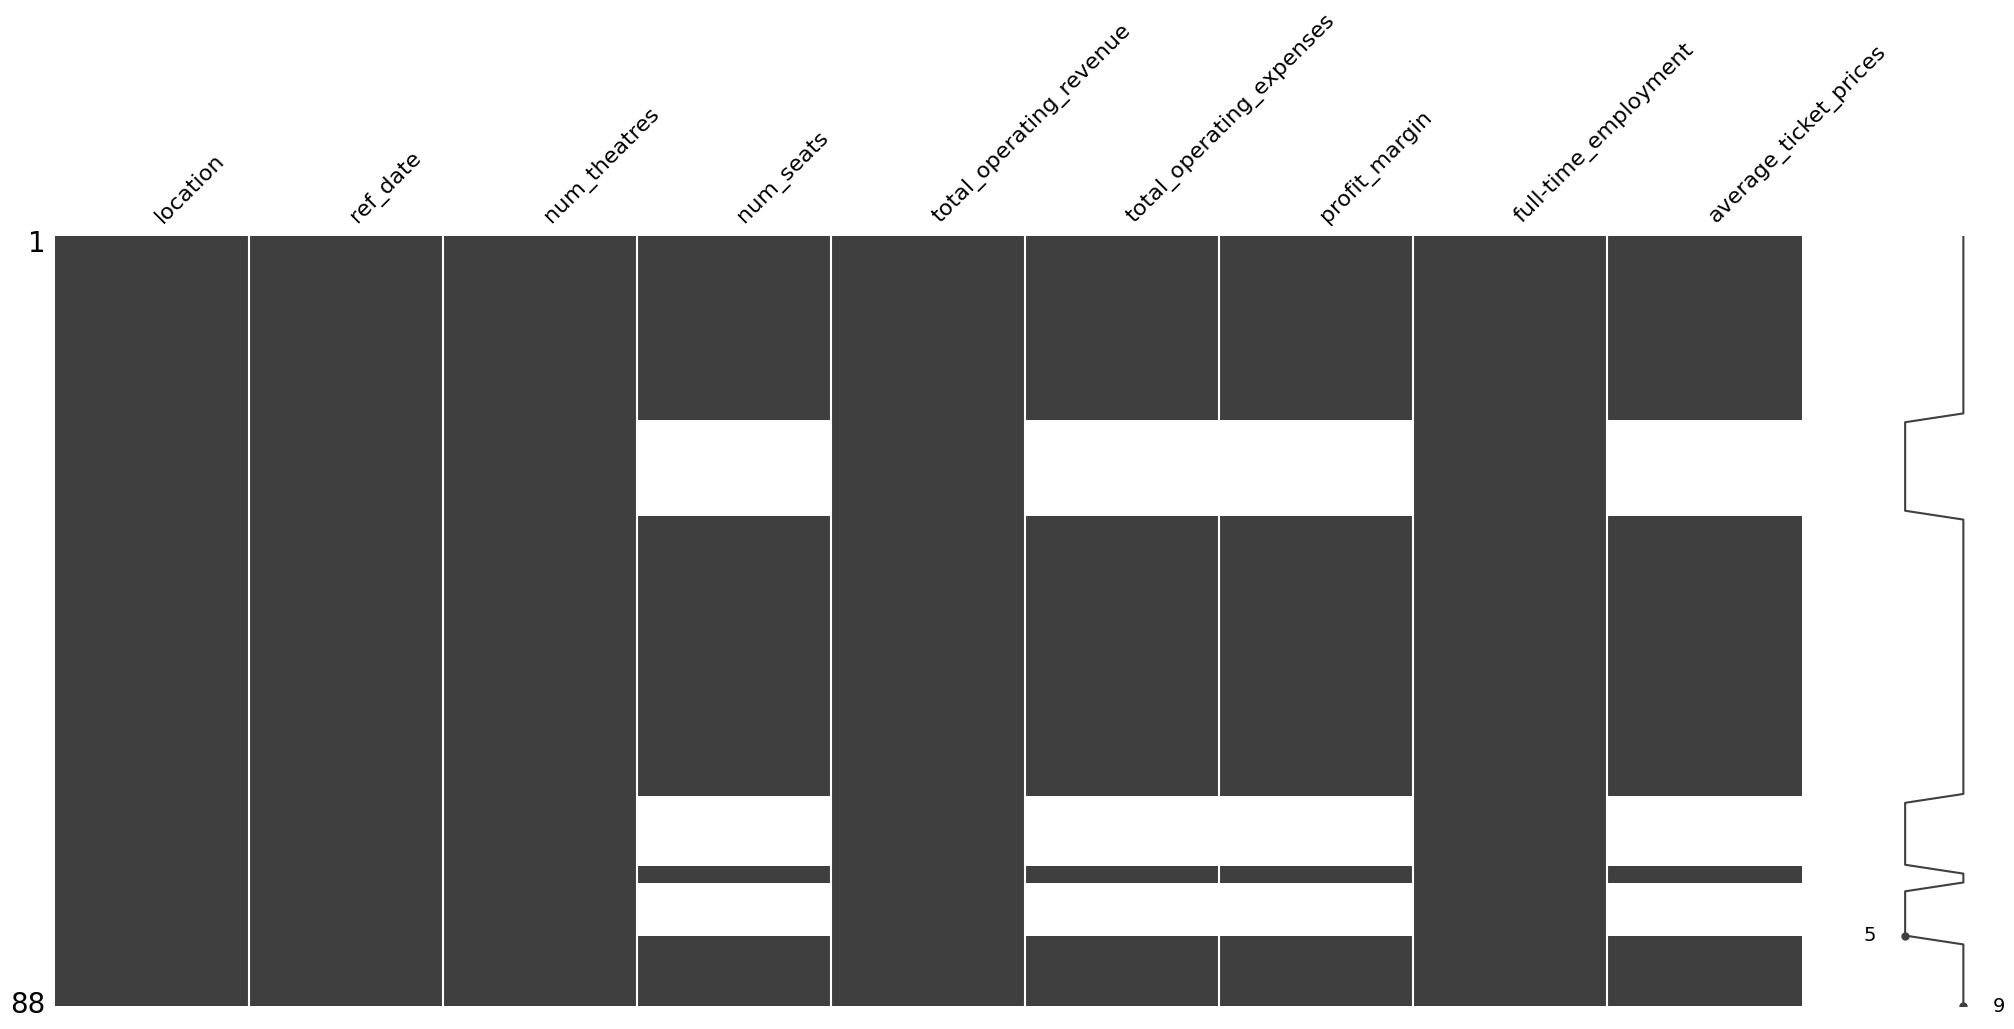

In [142]:
# Exibe a matriz da nulidade do dataset
ms.matrix(dataset)

In [143]:
# Exclui linhas com valores nulos do dataset
dataset.dropna(inplace=True)

In [144]:
# Exibe novas dimensões do dataset
dataset.shape

(63, 9)

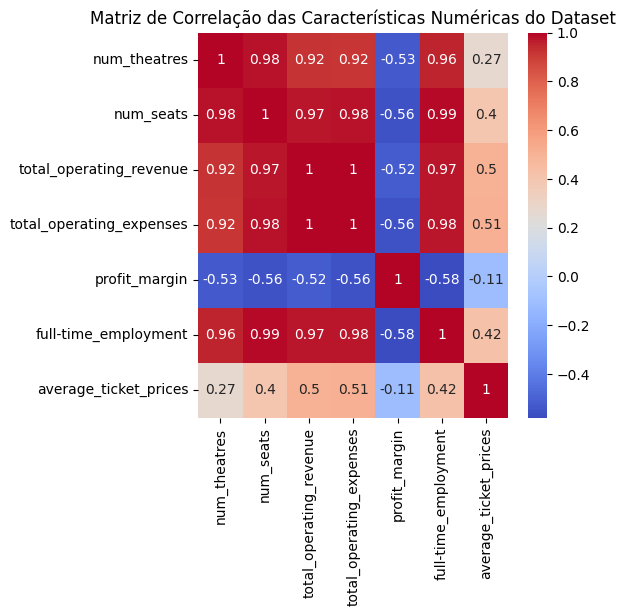

In [145]:
# Exibe o mapa de calor das variáveis numéricas
plt.figure(figsize=(5, 5))
numeric_df = dataset.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação das Características Numéricas do Dataset')
plt.show()

**Considerações:**
- Dataset inicial contém 88 registros com 9 atributos, sendo 2 catergóricos (location, ref_date) e 7 numéricos (num_theatres, num_seats, total_operating_revenue, total_operating_expenses, profit_margin, full-time_employment, average_ticket_prices).
- Dataset  apresenta-se balanceado em relação ao número de registros por categoria (location).
- Dataset contém outliers em 5 atributos (num_seats, total_operating_revenue, total_operating_expenses, profit_margin, full-time_employmen), os quais serão tratados no pipeline de pré-processamento.
- Dataset também contém valores nulos para 4 atributos (num_seats, total_operating_expenses,  profit_margin, average_ticket_prices), os quais foram retirados do dataset devido a ausência de valores que pudessem ser inseridos em substituição a esses, e principalmente devido a ausência de valores de average_ticket_prices para todos esses registros.
- Dataset apresenta baixa correlação entre os atributos e average_ticket_prices, sendo os maiores valores iguais a 0,51 e 0,50 para total_operating_expenses e total_operating_revenue repectivamente.

# Definição do Target, Variáveis e Divisão dos Dados

In [146]:
# Define tipo de problema
problem_type = "Regressão"

# Define target
target = "average_ticket_prices"

# Separa os dados entre features e target
x = dataset.drop(['average_ticket_prices'],axis=1) # Features
y = dataset['average_ticket_prices'] # Target

# Dividi os dados em conjuntos de treino e teste
test_size = 0.20 # Tamanho do conjunto de teste
seed = 7 # Semente aleatória
X_train, X_test, y_train, y_test = train_test_split(x, y,
    test_size=test_size, shuffle=True, random_state=seed) # Holdout

# Exibe tipo de problema, target e dimensões dos cojuntos
print ("Tipo de problema:",problem_type)
print("Target:",target)
print("Treino:", X_train.shape, "| Teste:", X_test.shape)

Tipo de problema: Regressão
Target: average_ticket_prices
Treino: (50, 8) | Teste: (13, 8)


**Considerações:**

  - Problema de regressão supervisionada cujo objetivo é prever um valor contínuo (valor do ingresso ou average_ticket_prices) a partir das características de geografia, intraestrutura e operações dos cinemas das províncias do Canadá.

#Tratamento de dados e Pipeline de pré-processamento

In [147]:
# Separa colunas categóricas e numéricas
num_cols = [c for c in X_train.columns if str(X_train[c].dtype).startswith(("float","int"))]
cat_cols = [c for c in X_train.columns if str(X_train[c].dtype).startswith(("object"))]

# Pré-processamento para colunas numéricas
numeric_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")), # Preenche valores ausentes com a mediana
    ("scaler", RobustScaler ()) # Escala os dados
])

# Pré-processamento para colunas categóricas
categorical_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")), # Preenche valores ausentes com valor mais frequente
    ("onehot", OneHotEncoder(handle_unknown="ignore")) # Codifica os dados
])

# Combina ambas as tranformações
preprocess = ColumnTransformer(transformers=[
    ("num", numeric_pipe, num_cols),
    ("cat", categorical_pipe, cat_cols)
])

# Exibe os nomes das colunas com variáeis numéricas e categóricas
print("num_cols:", num_cols[:10])
print("cat_cols:", cat_cols[:10])

num_cols: ['num_theatres', 'num_seats', 'total_operating_revenue', 'total_operating_expenses', 'profit_margin', 'full-time_employment']
cat_cols: ['location', 'ref_date']


**Considerações:**

- Pipeline de pré-processamento considera tratamento tanto para atributos numéricos quanto atributos catergóricos, embora o atual conjunto de dados não apesente ausência de dados para esses atributos.
- Pré-processamento para atributos numéricos considera a imputação de valores medianos em substituição ao valores nulos, estratégia escolhida em função da variabilidade dos valores. Também considera o escalonamento dos dados, estratégia escolhida devido a presença de outliers, além da distribuição dos dados não ser uma distribuição normal e do modelo comparar variáveis em diferentes escalas.
- Pré-processamento para atributos categóricos considera a imputação do valor mais frequente. Também considera a codificação one-hot encoding, estratégia escolhida em função dos atributos não serem categóricos ordinais, mas nominais (sem ordem).
- Pipeline identificou corretamente ambas as categorias de dados (numéricos e categóricos).

#Baseline e Modelos candidatos

In [148]:
# Define baseline e modelos candidatos
baseline = Pipeline(steps=[("pre", preprocess),
                               ("model", DummyRegressor(strategy="median"))])

cand_RandomForestReg = Pipeline([("pre", preprocess), ("model", RandomForestRegressor(random_state=seed))])

cand_SVR = Pipeline([("pre", preprocess), ("model", SVR())])

baseline

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['num_theatres', 'num_seats',
                                                   'total_operating_revenue',
                                                   'total_operating_expenses',
                                                   'profit_margin',
                                                   'full-time_employment']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['location', 'ref_date'])])),
                ('model', DummyRegressor(strategy='median'))])

**Considerações**
- Baseline escolhida tem como estratégia a previsão
da mediana de valores, pois é uma medida mais robusta a outliers.
- RandomForestReg escolhido por ser um modelo robusto, com boa performance em dados complexos e não lineares, além de reduzir o overfitting ao combinar os resultados de várias árvores e criar um modelo mais generalizado.
- SRV também escolhido devido ao desempenho em conjunto de dados menores e cenários onde os dados não seguem uma relação linear simples, além de ter como target um valor contínuo.

#Treino e Avaliação rápida


In [149]:
# Baseline

# Treina modelo
start_time = time.time() # Contagem do tempo
baseline.fit(X_train, y_train)
train_time_s = time.time() - start_time
y_pred = baseline.predict(X_test)
result_time = round(train_time_s, 2)

# Avalia modelo
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

result_mae = round(mae, 2) # Arredonda valores
result_r2 = round(r2, 2)

# Exibe resultados da avaliação do modelo
print("baseline_mae:", result_mae, "| baseline_r2:", result_r2, "| baseline_train_time_s",result_time)

baseline_mae: 0.66 | baseline_r2: -0.11 | baseline_train_time_s 0.02


In [150]:
# Treino RandomForestReg

# Treina modelo
start_time = time.time()
cand_RandomForestReg.fit(X_train, y_train)
train_time_s = time.time() - start_time
y_pred = cand_RandomForestReg.predict(X_test)
result_time = round(train_time_s, 2)

# Avalia modelo
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

result_mae = round(mae, 2)
result_r2 = round(r2, 2)

# Exibe resultados da avaliação do modelo
print("RandomForestReg_mae:", result_mae, "| RandomForestReg_r2:", result_r2, "| RandomForestReg_train_time_s",result_time)

RandomForestReg_mae: 0.46 | RandomForestReg_r2: 0.54 | RandomForestReg_train_time_s 0.17


In [151]:
# SVR

# Treina modelo
start_time = time.time()
cand_SVR.fit(X_train, y_train)
train_time_s = time.time() - start_time
y_pred = cand_SVR.predict(X_test)
result_time = round(train_time_s, 2)

# Avalia modelo
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

result_mae = round(mae, 2)
result_r2 = round(r2, 2)

# Exibe resultados da avaliação do modelo
print("SVR_mae:", result_mae, "| SVR_r2:", result_r2, "| SVR_train_time_s",result_time)

SVR_mae: 0.35 | SVR_r2: 0.73 | SVR_train_time_s 0.02


**Considerações**

- MAE (Mean Absolute Error) escolhida para avaliação dos modelos por ser menos sensível a outliers e estar na mesma unidade do target, o que facilita a avaliação. Quanto menor o valor, melhor o modelo.
- R² (Coeficiente de Determinação) escolhido também para avaliação dos modelos por avaliar a qualidade geral do ajuste do modelo, embora não possa ser utilizado como única métrica. Quanto mais próximo do valor de 1, melhor o modelo.
- O melhor valor para MAE foi obtido com modelo SVR (0.35), seguido do modelo RandomForestReg (0.46).
- O melhor valor para R² foi obtido com modelo SVR (0.73), seguido do RandomForestReg (0.54). Destaca-se que o valor negativo obtido com a baseline (-0.11) indica que o modelo tem desempenho pior que uma simples média dos valores reais.

#Validação e Otimização de hiperparâmetros

In [152]:
# Parciona para validação cruzada
cv = KFold(n_splits=10, shuffle=True, random_state=seed)

# Define modelo a otimizar
model = cand_SVR

# Define hiperparâmetros
param_distributions = {
    'model__kernel': ['poly', 'rbf'], # Tipos de kernel
    'model__C': [0.1, 1, 10], # Parâmetro de regularização
    'model__epsilon': [0.01, 0.1, 0.5], # Margem de tolerância
    'model__degree': [2, 3],
    'model__coef0': [0, 0.1, 1],
    'model__gamma': ['scale', 'auto'] # Coeficiente do kernel
}

# Define scorer
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Define random_search
random_search = RandomizedSearchCV(
    estimator = model,
    param_distributions = param_distributions, # Dicionário de parâmetros
    n_iter = 48,  # Número de combinações a testar
    scoring = mae_scorer,  # Métrica de avaliação
    cv = cv,  # Número de folds para validação cruzada
    verbose = 2, # Nível de verbosidade
    random_state = seed,
    n_jobs = -1  # Número de threads
)

# Ajustar o modelo aos dados
random_search.fit(X_train, y_train)

# Exibir melhores parâmetros e melhor score
print("Melhores parâmetros:", random_search.best_params_)
print("Melhor score:", -random_search.best_score_)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
Melhores parâmetros: {'model__kernel': 'poly', 'model__gamma': 'auto', 'model__epsilon': 0.1, 'model__degree': 2, 'model__coef0': 1, 'model__C': 10}
Melhor score: 0.22399027829589285


**Considerações**

- Número de folds igual a 10 foi utilizado para maximizar o uso dos dados para treinamento e teste, considerando as dimensões reduzidas no dataset.

- RandomizedSearchCV foi utilizado para melhor tempo de processamento, devido ao espaço de busca maior (mais combinações possíveis dos hiperparâmetros), ao utilizar GridSearchCV o tempo de processamento foi superior a 1min.

- Hiperparâmetros escolhidos:

  - kernel: considera a ausência da função linear dedido a baixa correlação observada na análise exploratória dos dados.
  
  - C: determina valores com maior penalização para os erros, mentendo menores valores.
  
  - epsilon: considera um maior ajuste aos dados, mantendo menores valores.

  - degree: determina o grau do polinômio  de forma a capturar relações não lineares sem adicionar complexidade.

  - coef0: considera o valor padrão (igual a zero) e valores menores para ajustar a influência do termo constante.

  - gama: considera o valor padrão (igual a "scale") e também "auto" para controlar a influência de cada ponto de dado.



# Avaliação final

In [153]:
# Melhor modelo

# Treina modelo
best_model = random_search.best_estimator_ # Retorna modelo treinado com melhores hiperparâmetros
start_time = time.time()
y_pred = best_model.predict(X_test)
train_time_s = time.time() - start_time
result_time = round(train_time_s, 2)

# Avalia modelo
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

result_mae = round(mae, 2)
result_r2 = round(r2, 2)

# Exibe resultados da avaliação do modelo
print("best_model_mae:", result_mae, "| best_model_r2:", result_r2, "| best_model_train_time_s",result_time)

best_model_mae: 0.27 | best_model_r2: 0.76 | best_model_train_time_s 0.01




**Considerações**

- MAE (0.27) é menor que o valor encontrado no treino inicial (0.35). Quanto menor o valor, melhor o modelo.
- R² (0.76) é maior que o valor encontrado no treino inicial (0.73). Quanto mais próximo o velor de 1, melhor o modelo.
- Os valores confirmam o melhor desempenho desse modelo otimizado em relação ao treino inicial, em ambas as métricas utilizadas.

# Conclusão e próximos passos

Uma mochileira amante de cinema precisava estimar os valores dos ingressos do cinema para escolher o melhor destino para suas férias, por isso buscou o modelo mais ajustado para estimar o valor dos ingressos nas províncias do Canadá.

A análise e pré-processamento do dataset demostraram seu balaceamento inicial, contudo foram necessários tratamentos para valores nulos encontrados ao longo das análises. Além disso, a análise exploratória revelou correlações pouco significativas entre features e target.

A pipeline de pré-processamento para colunas numéricas e categóricas considerou a imputação de valores (em casos de valores ausentes), bem como o escalonamento (devido a presença de outliers)
e codificação de dados (devido aos variáveis caregóricas).

A análise dos resultados dos treinos da baseline (DummyRegressor) e modelos candidatos (RandomForestReg e SVR), além da otimização de hiperparâmetros, permitiu a definição do melhor modelo considerando a função SVR bem como os hiperparâmetros otimizados (kernel='poly', C=10,  epsilon=0, degree = 2, coef0 = 1, gamma='auto').

As principais limitações estão relacionadas com a qualidade dos dados (ausência de informações afetou as dimensões do dataset, sendo necessária exclusão de registros), a quantidade de registros (particionamento em mais folds necessário para maximizar o uso dos dados), o processamento dos dados (estratégia para otimização de parâmetros considerou menor tempo de processamento em detrimento da análise de todas as combinações possível).